#### [ 패션 MNIST 데이터 불러오기 ]  
: 합성곱 신경망은 2차원 이미지를 그대로 사용하기 때문에 일렬로 펼치는 작업이 불필요  
: 입력 이미지는 항상 깊이(채널)이 있어야 함

In [1]:
import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state = 42)

2025-11-23 17:31:38.462252: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-23 17:31:38.462731: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-23 17:31:38.465735: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-23 17:31:38.474339: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763886698.486880   29320 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763886698.49

#### [ 합성곱 신경망 만들기 ]

In [2]:
model = keras.Sequential()
model.add(keras.layers.Input(shape=(28,28,1)))
model.add(keras.layers.Conv2D(32, kernel_size=3, activation = 'relu', padding='same'))

W0000 00:00:1763886702.982207   29320 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [3]:
model.add(keras.layers.MaxPooling2D(2))

(2, 2) 풀링을 적용했으므로 특성 맵의 크기는 절반  
32개의 필터를 사용하여 특성 맵의 깊이는 32가 됨

In [4]:
# 첫 번째 합성곱-풀링 층 다음에 두 번째 합성곱-풀링 층을 추가
# 두 번째 합성곱-풀링 층은 첫 번째와 거의 동일하고 필터의 개수를 64개로 늘린 점만 다름

model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

3차원 특성 맵을 일렬로 펼칠 차례
: 마지막 10개의 뉴런을 가진(밀집) 출력층에서 확률을 계산하기 때문

<구성 순서>
Flatten클래스 ==> Dense 은닉층 ==> Dense 출력층

In [5]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

은닉층과 출력층 사이에 드롭아웃을 넣는다.  
: 드롭아웃 층이 과대적합을 막아줌

In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       313,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

첫 번째 합성곱 층 통과: 특성 맵의 깊이 32가 됨  
두 번째 합성곱 층 통과: 특성 맵의 깊이 64가 됨

첫 번째 풀링 층 통과: 28에서 14  
두 번째 풀링 층 통과: 14에서 7

In [7]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


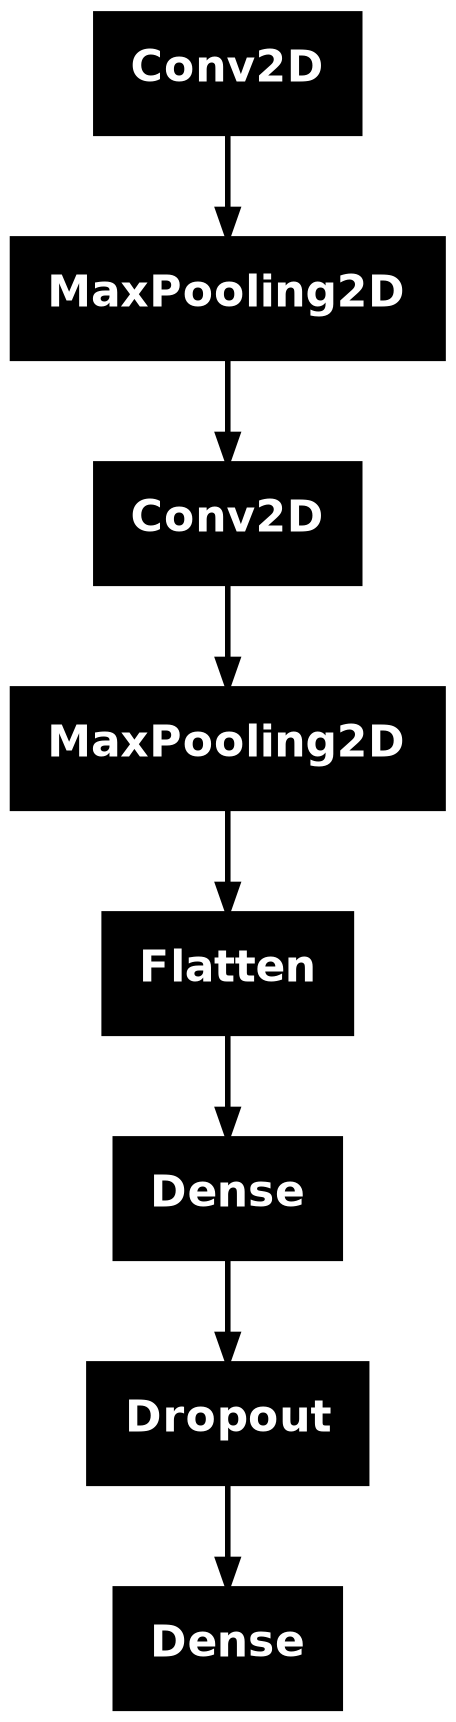

In [9]:
keras.utils.plot_model(model)

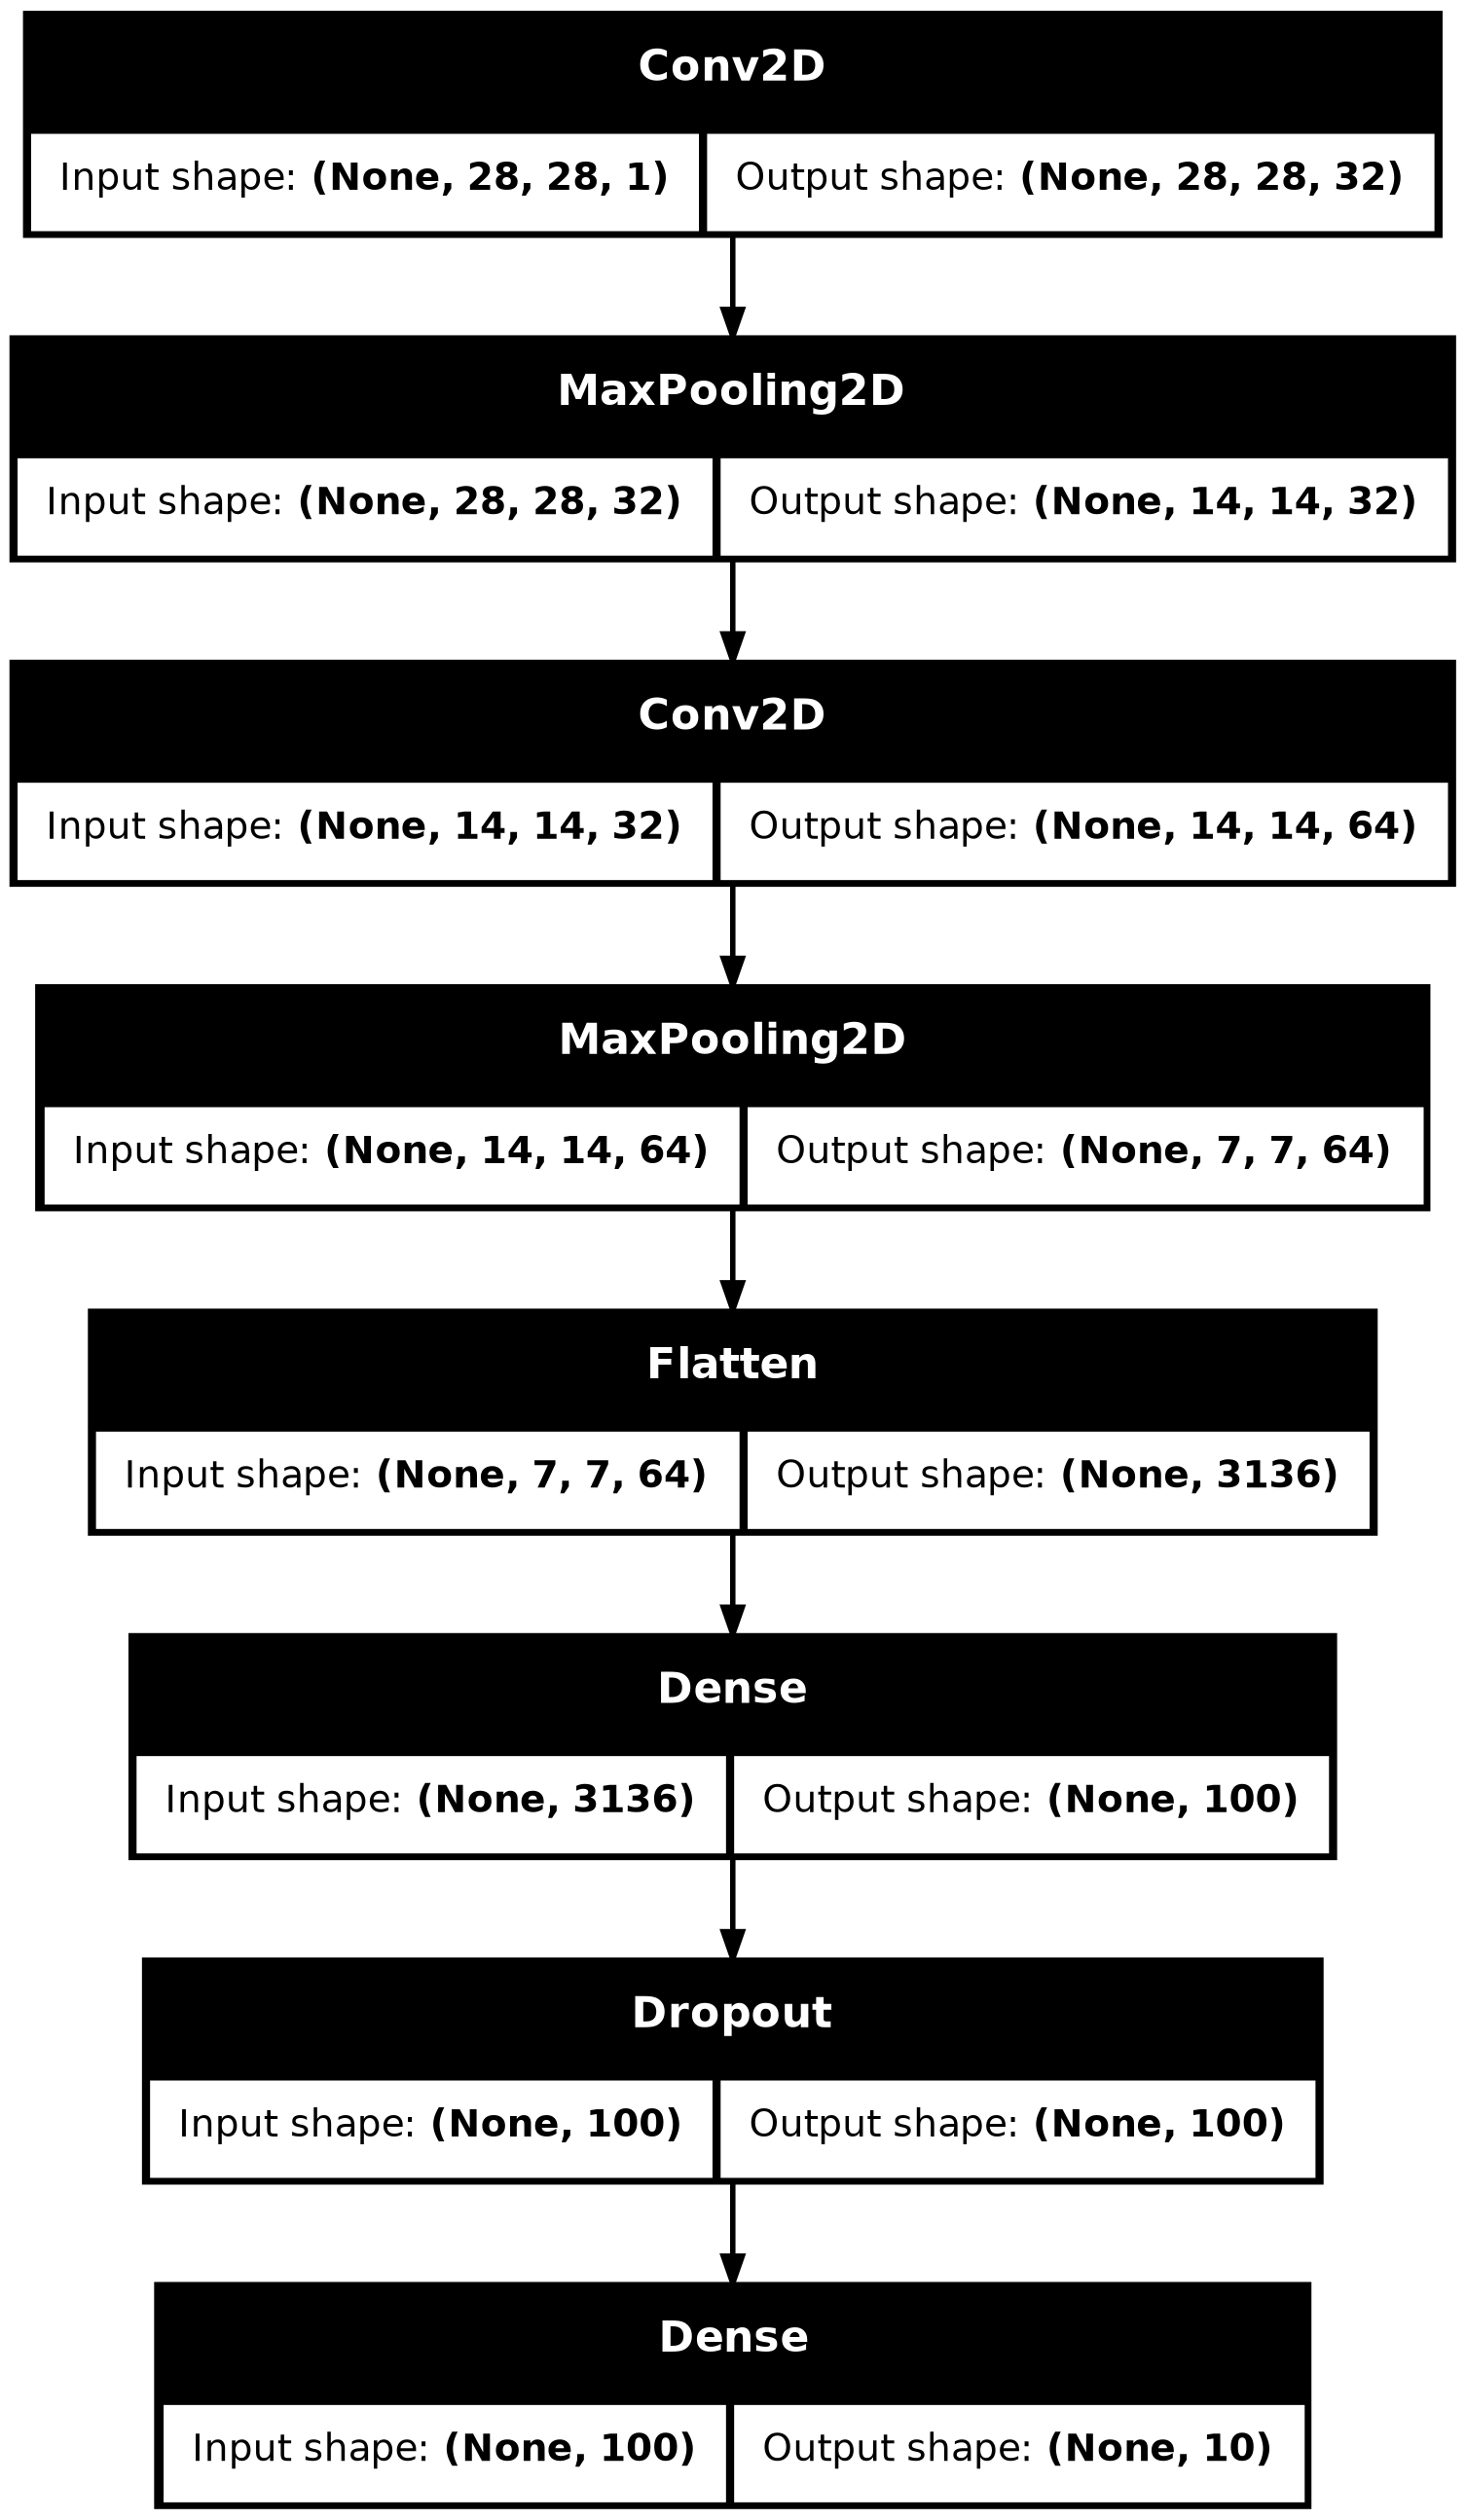

In [10]:
keras.utils.plot_model(model, show_shapes=True)

#### [ 모델 컴파일과 훈련 ]

In [12]:
# Adam 옵티마이저를 사용하고 ModelCheckpoint 콜백과 EarlyStopping 콜백을 함께 사용해 조기 종료 기법을 구현

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7416 - loss: 0.7271 - val_accuracy: 0.8791 - val_loss: 0.3265
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.8724 - loss: 0.3575 - val_accuracy: 0.8907 - val_loss: 0.2917
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.8900 - loss: 0.3022 - val_accuracy: 0.9047 - val_loss: 0.2508
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9043 - loss: 0.2660 - val_accuracy: 0.9093 - val_loss: 0.2424
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9141 - loss: 0.2376 - val_accuracy: 0.9113 - val_loss: 0.2370
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9198 - loss: 0.2165 - val_accuracy: 0.9162 - val_loss: 0.2245
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9227 - loss: 0.2069 - val_accuracy: 0.9200 - val_loss: 0.2211
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9324 -

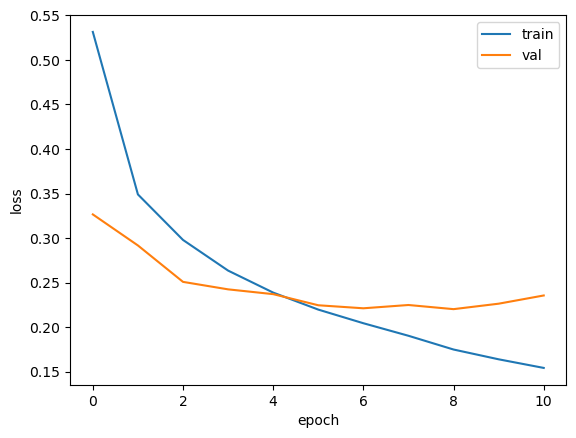

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

EarlyStopping 클래스에서 restore_best_weights 매개변수를 True로 지정했으므로 현재 model 객체가 최적의 모델 파라미터로 복원  
즉 ModelCheckpoint 콜백이 저장한 best_cnn_model.keras 파일을 다시 읽을 필요가 없다.

In [14]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9257 - loss: 0.2112


[0.22015096247196198, 0.9230833053588867]

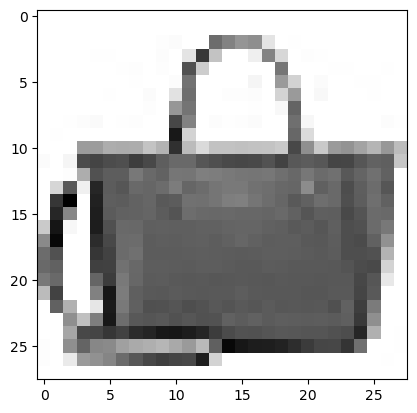

In [15]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [16]:
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
[[2.4531496e-16 3.5150927e-28 8.3485376e-21 2.6593511e-20 4.1987555e-22
  1.5188877e-19 2.7620987e-16 1.6841841e-17 1.0000000e+00 1.8082881e-15]]


##### [ 슬라이싱을 사용한 이유 ]  
: 샘플 하나를 전달할 때(28,28,1)이 아니라 (1,28,28,1) 크기를 전달해야 한다.

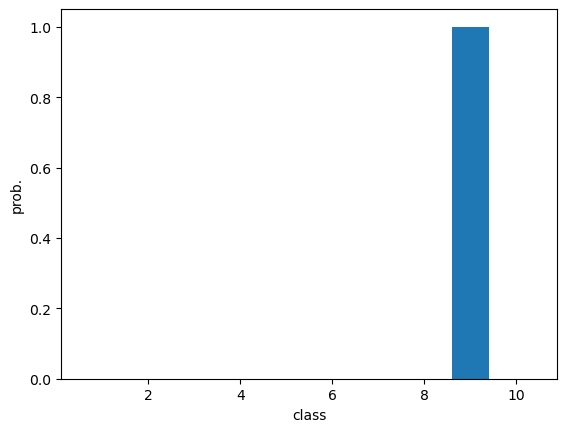

In [17]:
plt.bar(range(1,11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [18]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클부츠']

In [19]:
import numpy as np
print(classes[np.argmax(preds)])

가방


픽셀값의 범위를 0~1 사이로 바꿈  
채널 차원 추가를 위해 이미지 크기(28,28,1)로 변경

In [20]:
test_scaled = test_input.reshape(-1,28,28,1) / 255.0

In [21]:
model.evaluate(test_scaled, test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9134 - loss: 0.2566


[0.24000133574008942, 0.9150999784469604]